# Imports

In [48]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
import scipy.optimize as opt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import itertools
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 

# The Dataset

### Read

In [36]:
hrt_df = pd.read_csv("hearth.csv")
hrt_df = hrt_df.astype('float64')
hrt_df.head()
hrt_df.dtypes

age         float64
sex         float64
cp          float64
trtbps      float64
chol        float64
fbs         float64
restecg     float64
thalachh    float64
exng        float64
oldpeak     float64
slp         float64
caa         float64
thall       float64
output      float64
dtype: object

### Select X , Y

In [57]:
x = hrt_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']].values
y = hrt_df['output']

hrt_df_x = np.asarray(hrt_df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']])
hrt_df_y = np.asarray(hrt_df['output'])

#hrt_df_x[0:5]
hrt_df_y[0:5]

array([1., 1., 1., 1., 1.])

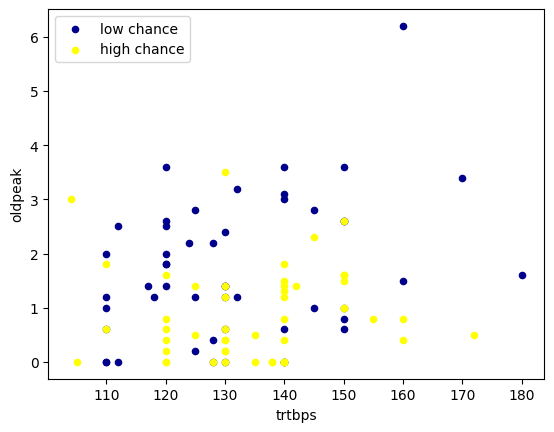

In [58]:
ax = hrt_df[hrt_df['output'] == 0][0:50].plot(kind='scatter', x='trtbps', y='oldpeak', color='DarkBlue', label='low chance');
hrt_df[hrt_df['output'] == 1][0:50].plot(kind='scatter', x='trtbps', y='oldpeak', color='Yellow', label='high chance', ax=ax);
plt.show()

# SVM >>> SVC

In [59]:
x_svm = hrt_df_x
y_svm = hrt_df_y

### Test/Train Separation

In [40]:
x_svm_train, x_svm_test, y_svm_train, y_svm_test = train_test_split(x_svm, y_svm, test_size=0.2, random_state=4)
print ('SVM Train Set:', x_svm_train.shape,  y_svm_train.shape)
print ('SVM Test Set:', x_svm_test.shape,  y_svm_test.shape)

SVM Train Set: (242, 13) (242,)
SVM Test Set: (61, 13) (61,)


### Classification

In [60]:
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(x_svm_train, y_svm_train)

clf_poly = svm.SVC(kernel='poly', degree=2)
clf_poly.fit(x_svm_train, y_svm_train)

clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(x_svm_train, y_svm_train)

clf_sigmoid = svm.SVC(kernel='sigmoid')
clf_sigmoid.fit(x_svm_train, y_svm_train)

SVC(kernel='sigmoid')

### Evaluation

In [61]:
y_linear = clf_linear.predict(x_svm_test)
y_poly = clf_poly.predict(x_svm_test)
y_rbf = clf_rbf.predict(x_svm_test)
y_sigmoid = clf_sigmoid.predict(x_svm_test)

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [51]:
kernel_list = [y_linear, y_poly, y_rbf, y_sigmoid]

for y_kernel in kernel_list:
    print("F1_Score: ", f1_score(y_svm_test, y_kernel, average='weighted'))

for y_kernel in kernel_list:
    print("F1_Score: ", classification_report(y_svm_test, y_kernel))

F1_Score:  0.9177578060193311
F1_Score:  0.6915690866510539
F1_Score:  0.6511395441823271
F1_Score:  0.4380598276153456
F1_Score:                precision    recall  f1-score   support

         0.0       0.92      0.88      0.90        25
         1.0       0.92      0.94      0.93        36

    accuracy                           0.92        61
   macro avg       0.92      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

F1_Score:                precision    recall  f1-score   support

         0.0       0.71      0.48      0.57        25
         1.0       0.70      0.86      0.78        36

    accuracy                           0.70        61
   macro avg       0.71      0.67      0.67        61
weighted avg       0.71      0.70      0.69        61

F1_Score:                precision    recall  f1-score   support

         0.0       0.67      0.40      0.50        25
         1.0       0.67      0.86      0.76        36

    accuracy                 

D:\Future\ML\0. Jadi\Codes MK\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Future\ML\0. Jadi\Codes MK\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Future\ML\0. Jadi\Codes MK\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization
[[22  3]
 [ 2 34]]
Confusion matrix, without normalization
[[12 13]
 [ 5 31]]
Confusion matrix, without normalization
[[10 15]
 [ 5 31]]
Confusion matrix, without normalization
[[ 0 25]
 [ 0 36]]


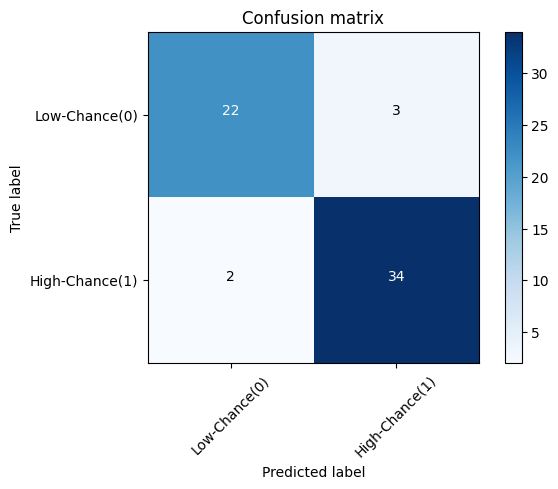

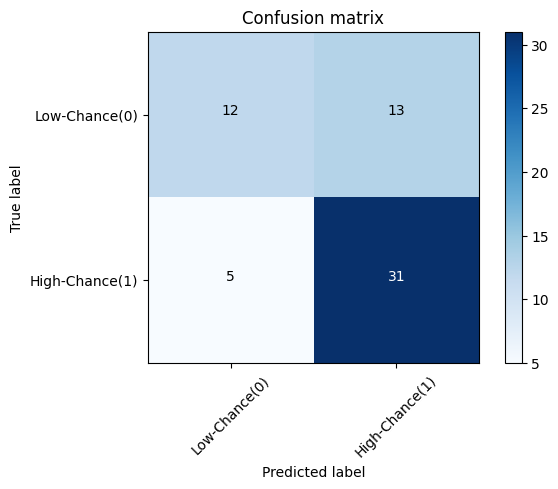

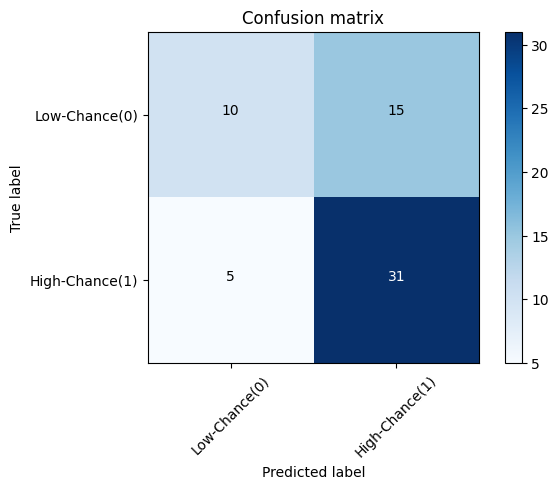

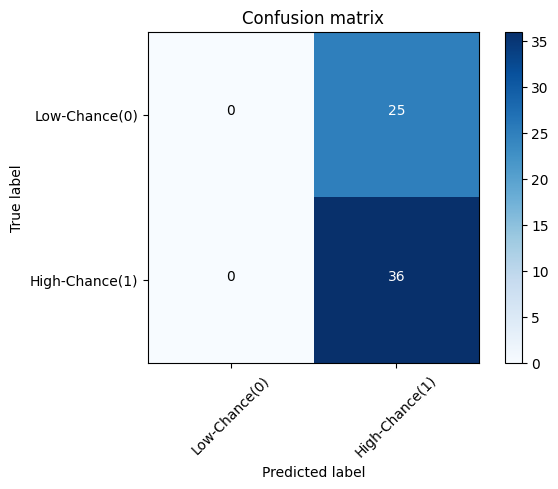

<Figure size 640x480 with 0 Axes>

In [52]:
for y_kernel in kernel_list:
    cnf_matrix = confusion_matrix(y_svm_test, y_kernel, labels=[0.,1.])
    plot_confusion_matrix(cnf_matrix, classes=['Low-Chance(0)','High-Chance(1)'],normalize= False,  title='Confusion matrix')
    plt.figure()

# SVM >>> NuSVC

In [87]:
clf_linear_nu = svm.NuSVC(kernel='linear')
clf_linear_nu.fit(x_svm_train, y_svm_train)

clf_poly_nu = svm.NuSVC(kernel='poly', degree=2)
clf_poly_nu.fit(x_svm_train, y_svm_train)

clf_rbf_nu = svm.NuSVC(kernel='rbf')
clf_rbf_nu.fit(x_svm_train, y_svm_train)

clf_sigmoid_nu = svm.NuSVC(kernel='sigmoid')
clf_sigmoid_nu.fit(x_svm_train, y_svm_train)

NuSVC(kernel='sigmoid')

In [88]:
y_linear_nu = clf_linear_nu.predict(x_svm_test)
y_poly_nu = clf_poly_nu.predict(x_svm_test)
y_rbf_nu = clf_rbf_nu.predict(x_svm_test)
y_sigmoid_nu = clf_sigmoid_nu.predict(x_svm_test)

In [93]:
print("F1_Score: ", f1_score(y_svm_test, y_linear_nu, average='weighted'))
print("Classification Report: ", classification_report(y_svm_test, y_linear_nu))

print("F1_Score: ", f1_score(y_svm_test, y_poly_nu, average='weighted'))
print("Classification Report: ", classification_report(y_svm_test, y_poly_nu))

print("F1_Score: ", f1_score(y_svm_test, y_rbf_nu, average='weighted'))
print("Classification Report: ", classification_report(y_svm_test, y_rbf_nu))

print("F1_Score: ", f1_score(y_svm_test, y_sigmoid_nu, average='weighted'))
print("Classification Report: ", classification_report(y_svm_test, y_sigmoid_nu))

F1_Score:  0.9170561562609
Classification Report:                precision    recall  f1-score   support

         0.0       0.95      0.84      0.89        25
         1.0       0.90      0.97      0.93        36

    accuracy                           0.92        61
   macro avg       0.93      0.91      0.91        61
weighted avg       0.92      0.92      0.92        61

F1_Score:  0.8999512323217166
Classification Report:                precision    recall  f1-score   support

         0.0       0.95      0.80      0.87        25
         1.0       0.88      0.97      0.92        36

    accuracy                           0.90        61
   macro avg       0.91      0.89      0.90        61
weighted avg       0.91      0.90      0.90        61

F1_Score:  0.8311933967671672
Classification Report:                precision    recall  f1-score   support

         0.0       0.89      0.68      0.77        25
         1.0       0.81      0.94      0.87        36

    accuracy           

Confusion matrix, without normalization
[[21  4]
 [ 1 35]]
Confusion matrix, without normalization
[[20  5]
 [ 1 35]]
Confusion matrix, without normalization
[[17  8]
 [ 2 34]]
Confusion matrix, without normalization
[[11 14]
 [16 20]]


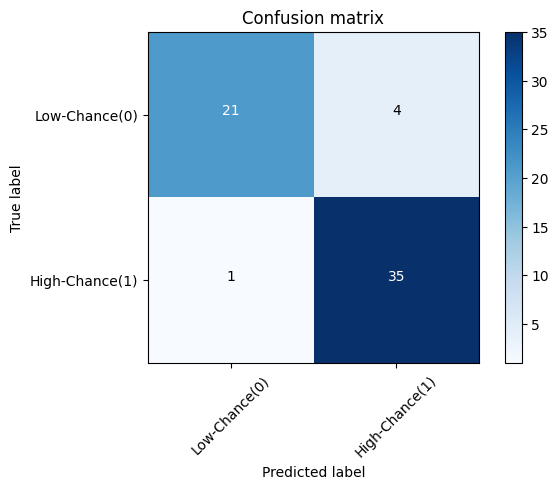

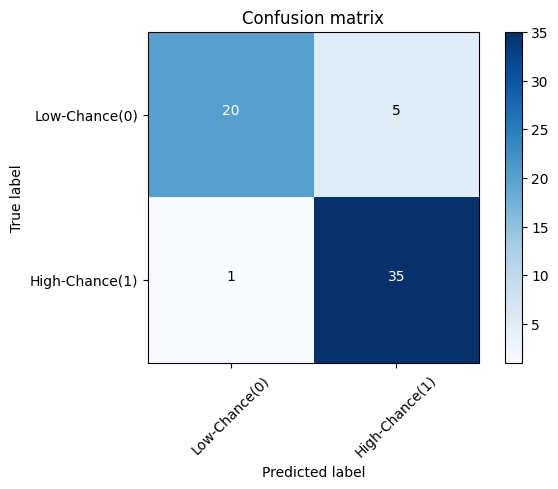

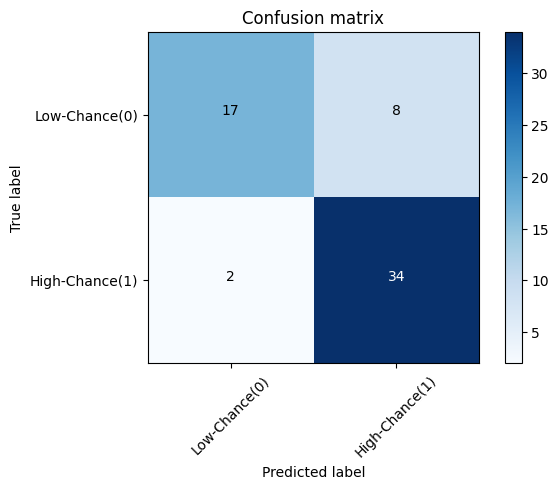

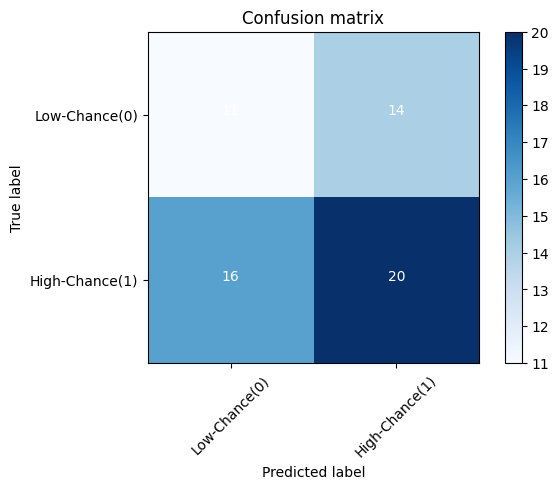

<Figure size 640x480 with 0 Axes>

In [94]:
kernel_list = [y_linear_nu, y_poly_nu, y_rbf_nu, y_sigmoid_nu]

for y_kernel in kernel_list:
    cnf_matrix = confusion_matrix(y_svm_test, y_kernel, labels=[0.,1.])
    plot_confusion_matrix(cnf_matrix, classes=['Low-Chance(0)','High-Chance(1)'],normalize= False,  title='Confusion matrix')
    plt.figure()